# Using packages in Python

You will have explored some basic Python in the previous notebook. Here we will explore a couple of commonly used Python packages in environmental science, namely `xarray`, used for manipulating array-like data (typically processed observations, and model output), and `matplotlib.pyplot`, a plotting library.

To use the functionalities offered by these packages within our Python scripts/notebooks, we first need to import them.

```
import xarray
import matplotlib.pyplot
```

To save typing later on (you'll see very shortly), we can give these packages an alias. These two are typical for `xarray` and `matplotlib`. It's common for the first cell in a notebook, or the top of a script, to contain all the import statements for the packages we'll need for that particular notebook or script.

```
import xarray as xr
import matplotlib.pyplot as plt
```

However, since we're just playing around here, let's put these import statements in the next cell.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

Now, whenver we want to access the functions within these packages, we just call them using the package name (or alias).

Let's make a simple line plot, using the `plt.plot` function. You can look up the documentation on the `matplotlib` website, but in essence, this function takes two arguments, `x` and `y`. Let's do a really simple example here.

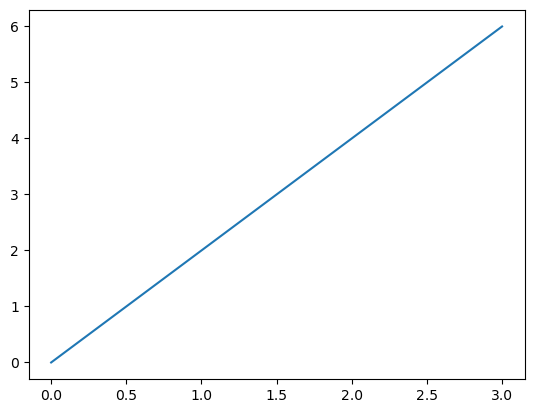

In [2]:
plt.plot([0, 1, 2, 3], [0, 2, 4, 6])

Voila, a line plot. We'll use the bit of `matplotlib` within `xarray` a bit later to plot some example model output. `matplotlib` contains a lot of routines to customise your plot to (almost) your heart's desire.
Some common ones are:
- `plt.title("Title of Plot")`
- `plt.legend()`: you must pass the `label="label"` option to `plt.plot` for labels to show up
- `plt.xlabel("x axis label")` 
- `plt.savefig("/path/to/file.extension")`: for saving your plot to disk

## Data

The `xarray` library has many functions for cropping, analysing, performing functions on and plotting data on coordinates, and we'll be exploiting this in this workshop.
The most common way to read data into an `xarray` object is to use the `open_dataset` function, along with a path to the file where the data live.

`xarray` provide an example dataset on their website, which we'll use here for simplicity: for the case of this workshop you'll just replace this line with one that looks like `ds = xr.open_dataset("/path/to/dataset.nc")`. There is also a function called `open_mfdataset` which we can use to open one xarray dataset from many files (for example, if you have model data with one file per time slice). This also has performance benefits, since the entire dataset isn't loaded into memory at once. 

For this example, we'll use the example tutorial dataset, which we open slightly differently.

In [3]:
ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Here we can see that this *dataset* is on three dimensions: time, lat and lon, with corresponding coordinates. Sometimes you can have coordinates defined on multiple dimensions, for example if you have a map projection where latitude and longitude do not change uniformly in x and y. There is one variable, air, on dimensions time, lat and lon. 
We can access air, either with square brackets or a dot like so:
- `ds.air`
- `ds["air"]`

In [4]:
ds.air

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
        [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
        [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[242.1 , 242.7 , 243.1 , ..., 232.  , 233.6 , 235.8 ],
        [243.6 , 244.1 , 244.2 , ..., 231.  , 232.5 , 235.7 ],
        [253.2 , 252.89, 252.1 , ..., 230.8 , 233.39, 238.5 ],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
...
        [294.79, 295.29, 297.49, ..., 295.49, 295.39, 294.69],
        [296.79, 297.89, 298.29, ..., 295.49, 295.49, 294.79],
        [298.19, 299.19, 298.79, ..., 296.09, 295.79, 295.79]],

       [[245.79, 244.79, 243.49, ..., 243.29, 243.99, 244.79],
        [249.89, 249.29, 248.49, ..., 241.29, 242.49, 244.29],
        [262.39, 261.79, 261.29, ..., 240.49, 243.09, 246.89],
        ...,
        [293.69, 293.89, 295.39, ..., 295.09, 294.69, 294.29],
        [296.29, 297.19, 297.59, ..., 295.29, 295.09, 294.39],
        [297.79, 298.39, 298.49, ..., 295.69, 295.49, 295.19]],

       [[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
        [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
        [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
        ...,
        [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
        [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
        [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]]],
      shape=(2920, 25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

`xarray` calls this object a *DataArray*, and there are some routines within `xarray` that only work with *DataArrays*, as opposed to *Datasets*, which can be thought of as a collection of *DataArrays*. 

## Subsetting with `xarray`

Suppose we want to look at the temperature data from the final time in the data, 2014-12-31T18:00:00. The easiest way is to use list indexing on the data, but we can also use the `.sel` function to filter the data to the bit we're interested in. We saw just now that the DataArray 'air' is on three dimensions, `time`, `lat` and `lon`. We can subset this to our choosing, for example the last time slice:

In [5]:
ds["air"][-1]

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
       [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
       [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
       ...,
       [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
       [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
       [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]],
      shape=(25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [6]:
ds["air"].sel(time="2014-12-31T18:00")

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
       [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
       [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
       ...,
       [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
       [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
       [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]],
      shape=(25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

We can also subset over more than one dimension. The following two cells subset the data the same way.

In [7]:
ds["air"][-1, :, 0]

<xarray.DataArray 'air' (lat: 25)> Size: 200B
array([245.09, 249.89, 262.99, 272.19, 271.19, 270.99, 272.59, 274.29,
       276.79, 276.89, 277.59, 278.69, 279.79, 281.39, 282.09, 284.49,
       285.99, 287.59, 289.49, 289.79, 291.49, 292.89, 293.79, 296.09,
       297.69])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
    lon      float32 4B 200.0
    time     datetime64[ns] 8B 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [8]:
ds["air"].sel(time="2014-12-31T18:00", lon=200.0)

<xarray.DataArray 'air' (lat: 25)> Size: 200B
array([245.09, 249.89, 262.99, 272.19, 271.19, 270.99, 272.59, 274.29,
       276.79, 276.89, 277.59, 278.69, 279.79, 281.39, 282.09, 284.49,
       285.99, 287.59, 289.49, 289.79, 291.49, 292.89, 293.79, 296.09,
       297.69])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
    lon      float32 4B 200.0
    time     datetime64[ns] 8B 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Applying functions to data

There are plenty functions we can apply to the data in a data array, such as `.mean`, which will calculate the mean value in the array. 

In [9]:
ds["air"].mean()

<xarray.DataArray 'air' ()> Size: 8B
array(281.25503697)

This has calculated the mean over the entire DataArray. We can also calculate functions over certain dimensions, if we like. So, to calculate the mean only over the `time` dimension we pass the `dim` argument to mean:

In [10]:
ds["air"].mean(dim="time")

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[260.37644178, 260.18305137, 259.88662671, ..., 250.81590068,
        251.93811644, 253.43804795],
       [262.73439384, 262.79397603, 262.74933904, ..., 249.75590411,
        251.58575685, 254.35926027],
       [264.7687637 , 264.32730822, 264.06169521, ..., 250.60789041,
        253.58351027, 257.71559932],
       ...,
       [297.64986301, 296.95333219, 296.62931507, ..., 296.81092466,
        296.28796233, 295.81645548],
       [298.12920205, 297.93700685, 297.47039384, ..., 296.85954795,
        296.7770274 , 296.44383562],
       [298.36615068, 298.38573973, 298.11414384, ..., 297.33820548,
        297.28144521, 297.30510274]], shape=(25, 53))
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0

## Visualising data

This is all very well and good, but how can we plot some of this data?

We can use `matplotlib`, for example to plot the mean temperature by latitude:

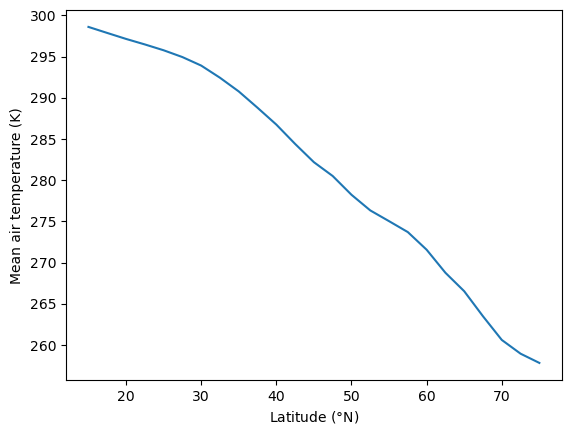

In [11]:
plt.plot(ds["air"]["lat"], ds["air"].mean(dim=["time", "lon"]))
plt.xlabel("Latitude ($\degree$N)")
plt.ylabel("Mean air temperature (K)")
plt.show()

`xarray` also has its own .plot functions, which we can use. Handily, these also infer x and y labels from the attributes within the DataArray.

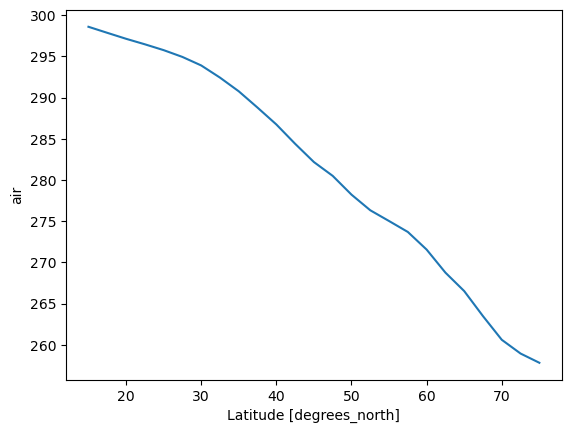

In [12]:
ds["air"].mean(dim=["time", "lon"]).plot()
# plt.xlabel('Latitude ($\degree$N)')
# plt.ylabel('Mean air temperature (K)')
plt.show()

We can also plot multiple lines at once, and label them.

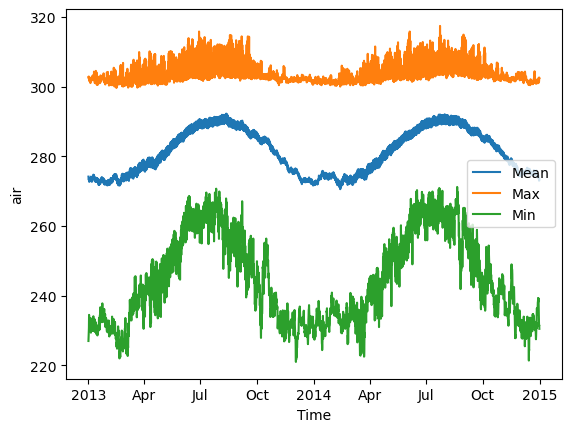

In [13]:
ds["air"].mean(dim=["lat", "lon"]).plot(label="Mean")
ds["air"].max(dim=["lat", "lon"]).plot(label="Max")
ds["air"].min(dim=["lat", "lon"]).plot(label="Min")
plt.legend()  # add labels
# plt.xlabel('Date')
# plt.ylabel('Air temperature (K)')
plt.show()

### 2D plots

We can also make 2D plots using .plot, if we pass a 2D array.

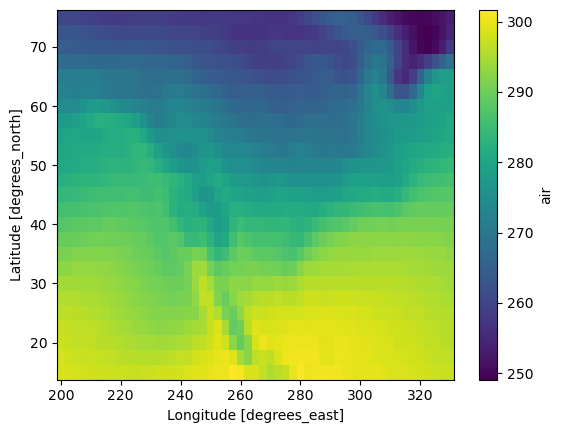

In [14]:
ds["air"].mean(dim=["time"]).plot()
plt.show()

## Extension: jazzy plots

We've now been able to plot some 2D data. Now we're going to use the library `cartopy` to make our plots easier to interpret by adding coastlines and gridlines.

We can also plot certain slices at certain times. These are more worked examples than a tutorial, but hopefully show you some of the things you can do.

In [15]:
import cartopy.crs as ccrs

/opt/jaspy/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


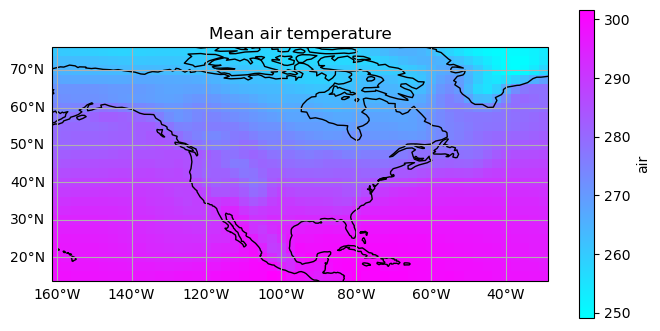

In [16]:
# we can use figsize to control the width and height of plots, in inches (blame the USA). This one will be 8 inches across by 4 inches tall.
fig = plt.figure(figsize=(8, 4))

# this adds a subplot to our figure, using the notation (number of rows, number of columns, plot number). Note this indexes from 1, not 0.
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())  

# plot the mean air temp on our axes, using the built-in colormap [sic] 'cool'. The default, 'viridis', is decent enough.
# Other colourmaps can be found at https://matplotlib.org/stable/users/explain/colors/colormaps.html.
ds["air"].mean(dim=["time"]).plot(ax=ax, cmap="cool")  

ax.coastlines()  # use cartopy to add coastlines to our plot
gl = ax.gridlines(draw_labels=True)  # add gridlines using cartopy.
gl.right_labels = False
gl.top_labels = False  # turn off extra labels

plt.title("Mean air temperature")  # add not very useful plot title

# save our plot as a png. Most image extensions work, pick your favourite. The bbox_inches=True argument makes matplotlib scale the plot.
# Take care when using savefig as it will overwrite at will!
plt.savefig("example_plot.png", bbox_inches="tight")  
plt.show()  # show the plot.

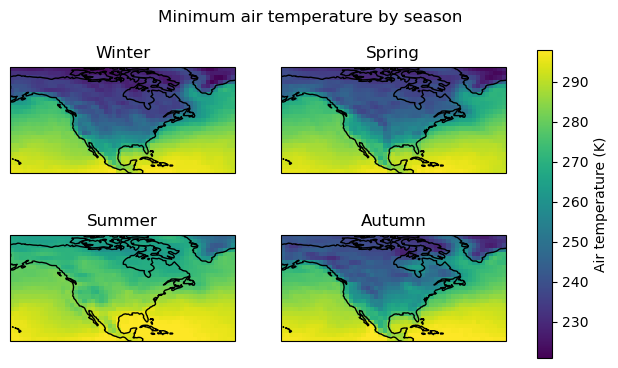

In [17]:
# Plot seasonal minimum temperature


fig = plt.figure(figsize=(8, 4))  # set up figure
ax = []  # make empty list to store our axes in
seasons = [[1, 2, 12],[3, 4, 5],[6, 7, 8],[9, 10, 11],]  # list of months to filter data by
labels = ["Winter", "Spring", "Summer", "Autumn"]  # corresponding labels

vmin = ds["air"].min(dim="time").min()  # get the min and max temperature for later
vmax = ds["air"].min(dim="time").max()

for i in range(4):  # essentially loop through the following code 4 times

    # add new axis to our figure, in the ith position
    ax.append(fig.add_subplot(2, 2, i + 1, projection=ccrs.PlateCarree()))
    # use the built-in xarray time accessor to filter our data to the chosen season and calculate the minimum.
    season = ds["air"][ds["air"].time.dt.month.isin(seasons[i])].min(dim=["time"])

    # plot the data on the ith axis, remove the colourbar and scale the colours to the min and max to ensure uniformity between subplots.
    img = season.plot(ax=ax[i], add_colorbar=False, vmin=vmin, vmax=vmax)

    ax[i].set_title(labels[i])  # add subplot title
    ax[i].coastlines()  # add coastlines
    i = i + 1
fig.suptitle("Minimum air temperature by season")  # add big title

# add colourbar to figure, shared between all four axes
fig.colorbar(img, ax=ax, label="Air temperature (K)") 
plt.show()